In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

In [23]:
#load the data
mydata = pd.read_csv("netflix_titles.csv")
mydata.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [24]:
#check the columns name
mydata.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [25]:
#Checking the data shape
print(f'The dataset contains {mydata.shape[0]} rows and {mydata.shape[1]} columns')

The dataset contains 8807 rows and 12 columns


In [26]:
#information about the dataset
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [27]:
# Checking the null values in the dataset
mydata.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

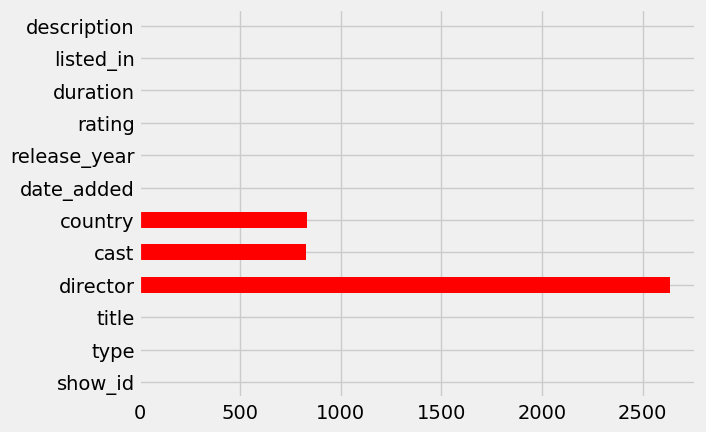

In [46]:
mydata.isnull().sum().plot(kind='barh',color='red')

In [29]:
# Remove missing values from the DataFrame
netflix=mydata.dropna()

# After removing missing values, check the data shape
print(f'The dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns')

The dataset contains 5332 rows and 12 columns


In [30]:
# Checking the duplicate values in the data
duplicate_values=mydata.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


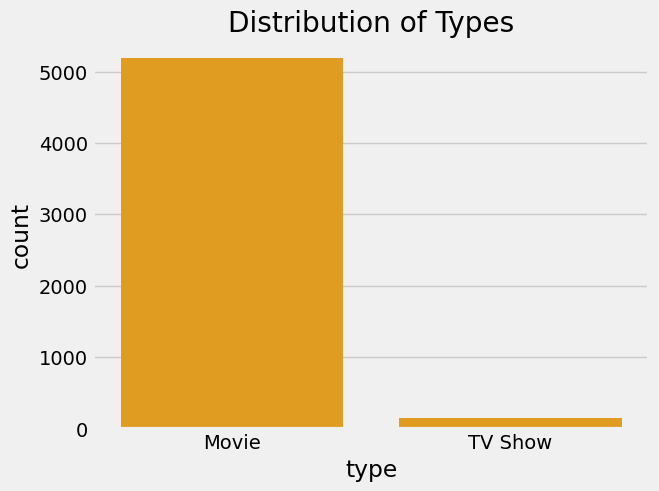

In [47]:
# Create a count plot for the 'type' column
sns.countplot(data=netflix, x='type',color='orange')

# Set the title of the plot
plt.title('Distribution of Types')

# Display the plot
plt.show()

In [32]:
# Select rows where 'type' is 'Movie'
movie = netflix[netflix['type'] == 'Movie']

In [33]:
# Remove 'min' suffix from values in the 'duration' column and convert to integers
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

In [34]:
# check data types of movie duration
print(movie['duration'].dtype)

int32


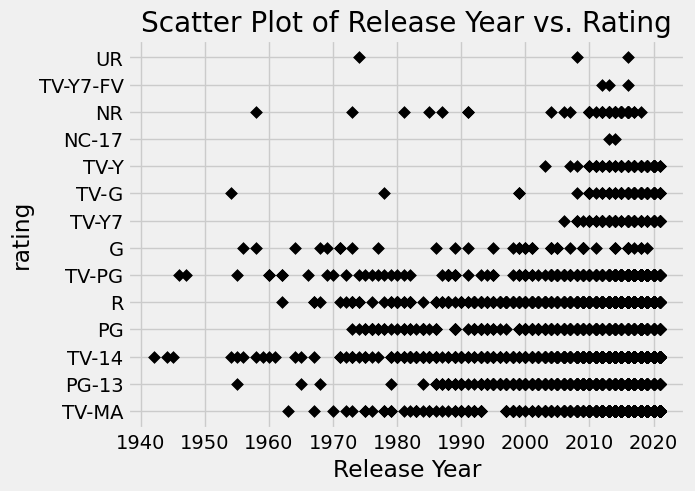

In [49]:
# Create a scatter plot of 'release_year' versus 'ratings'
plt.scatter(movie['release_year'], movie['rating'],marker='D',color='black')

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('rating')
plt.title('Scatter Plot of Release Year vs. Rating')

# Display the plot
plt.show()

In [50]:

# Find the index of the row with the maximum duration
max_duration_index = movie['duration'].idxmax()

# Get the corresponding release year and duration
corresponding_max_release_year = movie.loc[max_duration_index, 'release_year']
max_duration = movie.loc[max_duration_index, 'duration']

print(f"The movie with the maximum duration of {max_duration} minutes was released in the year {corresponding_max_release_year}.")

# Find the index of the row with the minimum duration
min_duration_index = movie['duration'].idxmin()

# Get the corresponding release year and duration
corresponding_min_release_year = movie.loc[min_duration_index, 'release_year']
min_duration = movie.loc[min_duration_index, 'duration']

print(f"The movie with the minimum duration of {min_duration} minutes was released in the year {corresponding_min_release_year}.")


The movie with the maximum duration of 253 minutes was released in the year 1973.
The movie with the minimum duration of 8 minutes was released in the year 2020.


In [51]:
# # Count the occurrences of each unique entry in the 'listed_in' column
# genre_counts = movie['listed_in'].value_counts()

# # Display the genre counts
# print("Genre Counts:")
# print(genre_counts)

# Count the occurrences of each unique entry in the 'listed_in' column
country = movie['country'].value_counts()

# Display the genre counts
print("Country Counts:")
print(country)

Country Counts:
country
United States                   1819
India                            868
United Kingdom                   164
Canada                           104
Egypt                             90
                                ... 
Spain, United Kingdom              1
Canada, Norway                     1
France, Senegal, Belgium           1
Uruguay, Guatemala                 1
United Arab Emirates, Jordan       1
Name: count, Length: 594, dtype: int64


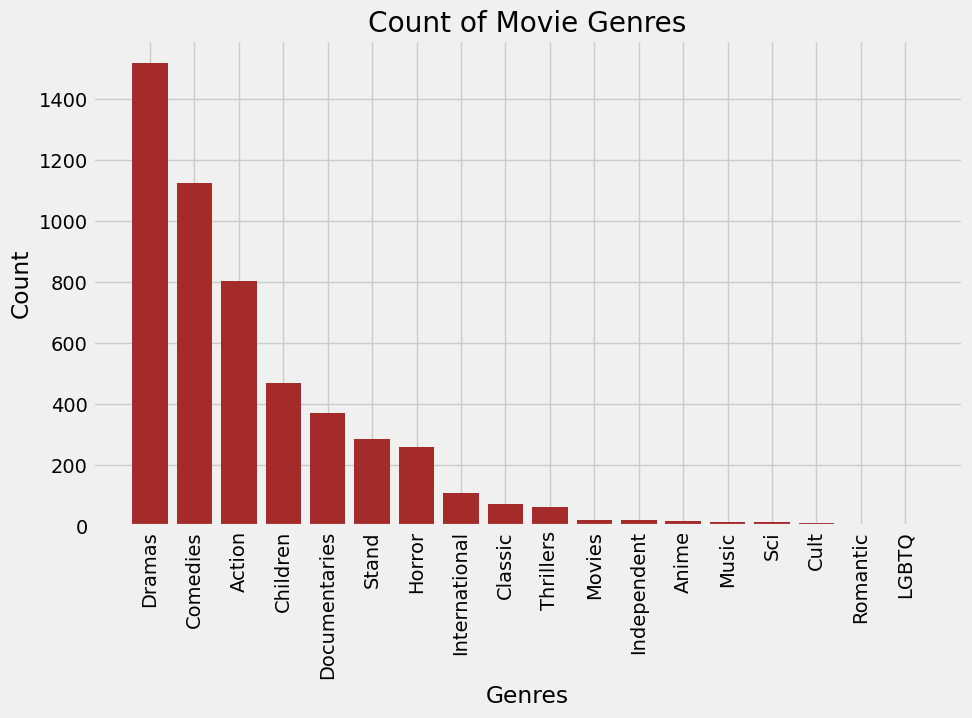

In [54]:
# Extract genres from the 'listed_in' column
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Count the occurrences of each genre
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_movie.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='brown')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()

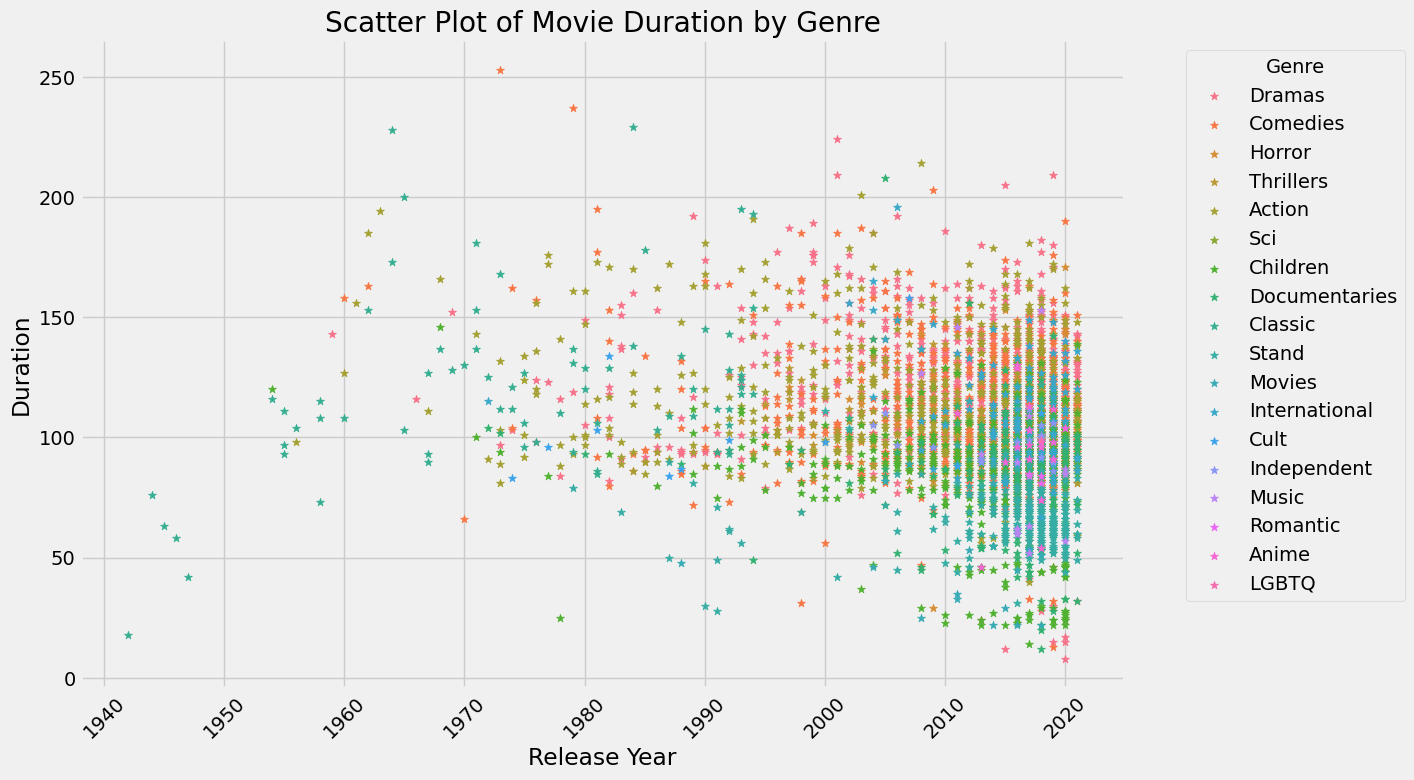

In [55]:
# Apply the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Create a color palette for each unique genre
palette = sns.color_palette("husl", len(movie['genres'].unique()))

# Create scatter plot with different colors for each genre
plt.figure(figsize=(12, 8))  # Increase the figure size here
for i, genre in enumerate(movie['genres'].unique()):
    plt.scatter(movie['release_year'][movie['genres'] == genre], 
                movie['duration'][movie['genres'] == genre], 
                label=genre, 
                color=palette[i],
                marker='*')

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Movie Duration by Genre')
plt.xticks(rotation=45)

# Position the legend outside the plot area
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [58]:
# Change the x data to movie['duration']
trace = go.Histogram(
    x=movie['duration'],  # Use movie duration for x-axis
    xbins=dict(size=0.2),
    marker=dict(color='yellow')
)

layout = go.Layout(
    template="plotly_dark",  # Dark theme layout
    title='Distribution of Movie Durations',  # Title of the plot
    xaxis=dict(title='Duration (Minutes)')  # X-axis label
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [41]:
movie['rating'].value_counts()

rating
TV-MA       1741
TV-14       1177
R            778
PG-13        470
TV-PG        416
PG           275
TV-G          81
TV-Y          71
TV-Y7         70
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

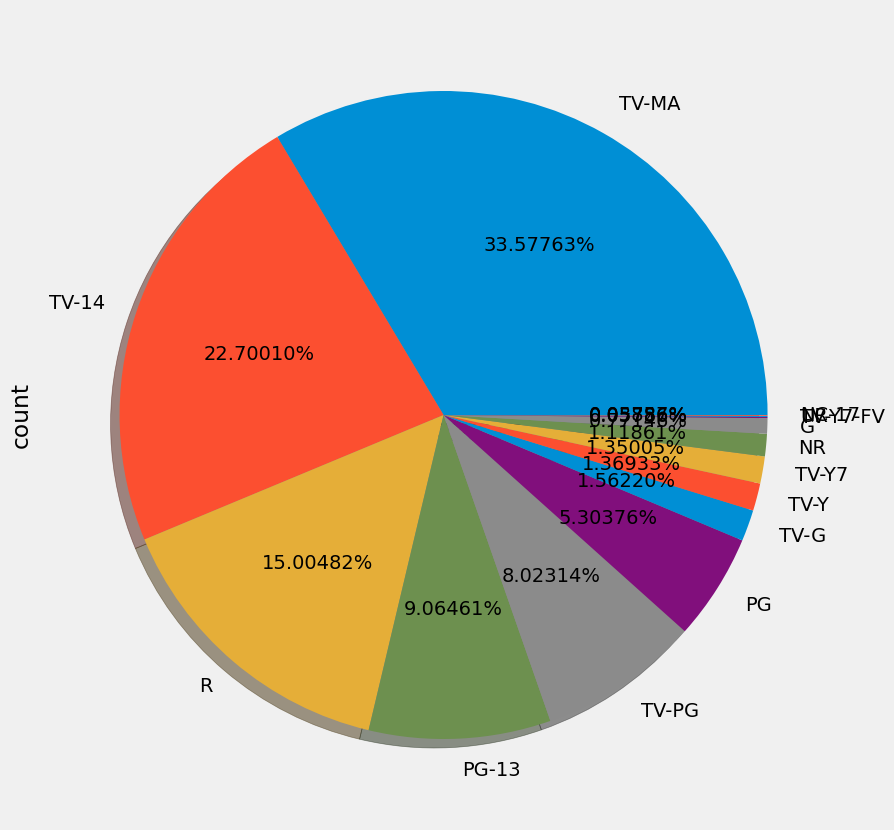

In [59]:
# Plot a pie chart to visualize the distribution of movie ratings
movie['rating'].value_counts().plot.pie(
    autopct='%1.5f%%',  # Add percentage labels to each wedge
    shadow=True,  # Add shadow effect to the pie chart
    figsize=(15, 10)  # Set the size of the figure
)

# Display the pie chart
plt.show()